# 📘 Probability Distributions in Hydrology

Welcome to this notebook on **Probability Distributions in Hydrology**. This notebook is part of a larger series combining Python programming, statistical learning, and hydrological modeling.

---

## 🎯 Learning Objectives
- Understand probability distributions and their relevance to hydrology
- Learn to fit and visualize statistical distributions using Python
- Apply distributions to model rainfall and streamflow data
- Evaluate distributions using visual and statistical tools

---

## 📂 Step 1: Load and Explore the Dataset
We will use annual maximum daily rainfall from a sample hydrological dataset.
Here we simulate synthetic rainfall data for demonstration purposes. You can replace it with real rainfall records later.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulate annual maximum rainfall (mm)
rainfall = np.random.gamma(shape=2.0, scale=30.0, size=50)
df = pd.DataFrame({'Year': np.arange(1970, 2020), 'Rainfall_mm': rainfall})
df.head()

C:\Users\Zuhail\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year,Rainfall_mm
0,1970,71.810382
1,1971,44.833942
2,1972,41.468508
3,1973,41.469069
4,1974,139.491432


## 📘 Step 2: Theoretical Background

In hydrology, many variables such as rainfall, streamflow, and drought duration follow well-known **probability distributions**.

- **Normal Distribution**: Bell-shaped, symmetric. Suitable for temperature, residuals.
- **Log-Normal**: Right-skewed. Useful for rainfall amounts.
- **Gamma**: Often used for rainfall and river flow.
- **Weibull**: Common in reliability and drought analysis.

We want to fit a distribution that best describes our data and then use it for predictions (e.g., return periods).

## 🔢 Step 3: Manual Histogram and Visual Fit
Before fitting, visualize the histogram and overlay a guessed distribution for comparison.

C:\Users\Zuhail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


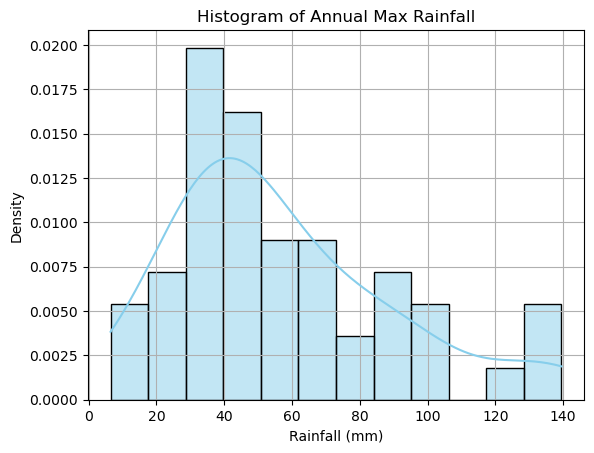

In [2]:
# Histogram with KDE
sns.histplot(df['Rainfall_mm'], kde=True, stat="density", bins=12, color='skyblue')
plt.title("Histogram of Annual Max Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

## 🛠 Step 4: Fit Probability Distributions using SciPy
We’ll fit Normal, Log-Normal, and Gamma distributions and compare their parameters and shapes.

In [3]:
from scipy import stats

# Fit Normal Distribution
norm_params = stats.norm.fit(df['Rainfall_mm'])
# Fit Log-Normal (use log values internally)
lognorm_params = stats.lognorm.fit(df['Rainfall_mm'], floc=0)
# Fit Gamma Distribution
gamma_params = stats.gamma.fit(df['Rainfall_mm'], floc=0)

print("Normal parameters (mu, sigma):", norm_params)
print("Log-Normal parameters (shape, loc, scale):", lognorm_params)
print("Gamma parameters (alpha, loc, beta):", gamma_params)

Normal parameters (mu, sigma): (57.127266961303256, 32.05592166909172)
Log-Normal parameters (shape, loc, scale): (0.6107191432145943, 0.0, 48.36001955929997)
Gamma parameters (alpha, loc, beta): (3.1579228692503793, 0, 18.09014004666428)


## 🌊 Step 5: Hydrological Application – Return Period Analysis
Estimate rainfall value for a 10-year return period using fitted distributions.

In [4]:
# Return period (T) to probability (P)
T = 10
P = 1 - 1/T

rain_10y_norm = stats.norm.ppf(P, *norm_params)
rain_10y_lognorm = stats.lognorm.ppf(P, *lognorm_params)
rain_10y_gamma = stats.gamma.ppf(P, *gamma_params)

print(f"10-year rainfall estimate (Normal): {rain_10y_norm:.2f} mm")
print(f"10-year rainfall estimate (Log-Normal): {rain_10y_lognorm:.2f} mm")
print(f"10-year rainfall estimate (Gamma): {rain_10y_gamma:.2f} mm")

10-year rainfall estimate (Normal): 98.21 mm
10-year rainfall estimate (Log-Normal): 105.78 mm
10-year rainfall estimate (Gamma): 100.23 mm


## 📈 Step 6: Visualization and Interpretation
Plot fitted distributions over histogram to visually evaluate the fits.

C:\Users\Zuhail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


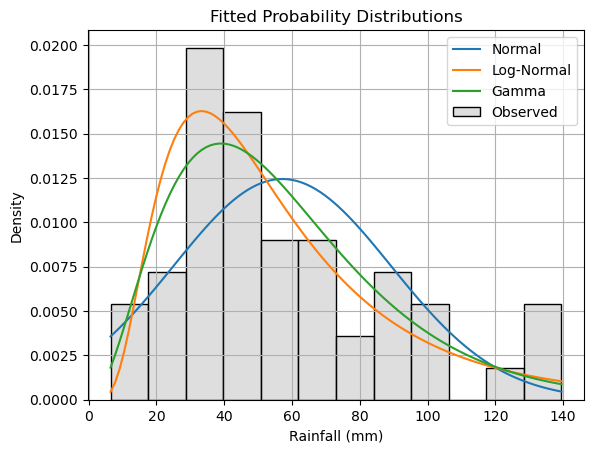

In [5]:
# Plot histogram and fitted PDFs
x = np.linspace(df['Rainfall_mm'].min(), df['Rainfall_mm'].max(), 100)
sns.histplot(df['Rainfall_mm'], kde=False, stat="density", bins=12, color='lightgray', label='Observed')
plt.plot(x, stats.norm.pdf(x, *norm_params), label='Normal')
plt.plot(x, stats.lognorm.pdf(x, *lognorm_params), label='Log-Normal')
plt.plot(x, stats.gamma.pdf(x, *gamma_params), label='Gamma')
plt.title("Fitted Probability Distributions")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Step 7: Practice Exercises
Try solving these on your own:

1. Change the distribution to **Weibull** and compare the fit.
2. Estimate rainfall for **50-year** and **100-year** return periods.
3. Use `scipy.stats.kstest` to compare goodness-of-fit for the 3 fitted distributions.
4. Fit the same distributions on your own regional rainfall dataset.

---

This concludes our notebook on probability distributions in hydrology. You now understand how to fit, visualize, and interpret distributions using real or simulated hydrological data.